In [3]:
import tensorflow as tf
from tensorflow import keras

import IPython
import kerastuner as kt

import numpy as np
import pandas as pd

In [4]:
(img_train, label_train), (img_test, label_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - ETA:  - ETA:  - 0s 0us/step


In [5]:
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

In [6]:
def model_builder(hp):
  
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [8]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'MNIST_Digits_kt')

In [9]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [10]:
tuner.search(img_train, label_train, epochs = 10, validation_data = (img_test, label_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.001.



In [16]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs = 10, validation_data = (img_test, label_test))

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 2.3828 - accuracy: 0.09 - ETA: 3s - loss: 1.4701 - accuracy: 0.58 - ETA: 3s - loss: 1.0727 - accuracy: 0.70 - ETA: 3s - loss: 0.8977 - accuracy: 0.74 - ETA: 3s - loss: 0.7866 - accuracy: 0.77 - ETA: 3s - loss: 0.7169 - accuracy: 0.79 - ETA: 3s - loss: 0.6589 - accuracy: 0.81 - ETA: 3s - loss: 0.6171 - accuracy: 0.82 - ETA: 3s - loss: 0.5800 - accuracy: 0.83 - ETA: 3s - loss: 0.5506 - accuracy: 0.84 - ETA: 3s - loss: 0.5298 - accuracy: 0.85 - ETA: 3s - loss: 0.5072 - accuracy: 0.85 - ETA: 3s - loss: 0.4836 - accuracy: 0.86 - ETA: 3s - loss: 0.4639 - accuracy: 0.86 - ETA: 3s - loss: 0.4538 - accuracy: 0.87 - ETA: 3s - loss: 0.4399 - accuracy: 0.87 - ETA: 2s - loss: 0.4291 - accuracy: 0.87 - ETA: 2s - loss: 0.4178 - accuracy: 0.88 - ETA: 2s - loss: 0.4077 - accuracy: 0.88 - ETA: 2s - loss: 0.4000 - accuracy: 0.88 - ETA: 2s - loss: 0.3905 - accuracy: 0.89 - ETA: 2s - loss: 0.3843 - accuracy: 0.89 - ETA: 2s - loss: 0.37

1875/1875 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.00 - ETA: 3s - loss: 0.0252 - accuracy: 0.99 - ETA: 4s - loss: 0.0235 - accuracy: 0.99 - ETA: 4s - loss: 0.0294 - accuracy: 0.99 - ETA: 4s - loss: 0.0292 - accuracy: 0.99 - ETA: 4s - loss: 0.0276 - accuracy: 0.99 - ETA: 3s - loss: 0.0270 - accuracy: 0.99 - ETA: 3s - loss: 0.0275 - accuracy: 0.99 - ETA: 3s - loss: 0.0292 - accuracy: 0.99 - ETA: 3s - loss: 0.0277 - accuracy: 0.99 - ETA: 3s - loss: 0.0275 - accuracy: 0.99 - ETA: 3s - loss: 0.0274 - accuracy: 0.99 - ETA: 3s - loss: 0.0271 - accuracy: 0.99 - ETA: 3s - loss: 0.0269 - accuracy: 0.99 - ETA: 3s - loss: 0.0265 - accuracy: 0.99 - ETA: 3s - loss: 0.0264 - accuracy: 0.99 - ETA: 3s - loss: 0.0260 - accuracy: 0.99 - ETA: 3s - loss: 0.0257 - accuracy: 0.99 - ETA: 3s - loss: 0.0253 - accuracy: 0.99 - ETA: 3s - loss: 0.0261 - accuracy: 0.99 - ETA: 2s - loss: 0.0261 - accuracy: 0.99 - ETA: 2s - loss: 0.0261 - accuracy: 0.99 - ETA: 2s - loss: 0.0260 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 1.00 - ETA: 3s - loss: 0.0086 - accuracy: 0.99 - ETA: 3s - loss: 0.0072 - accuracy: 0.99 - ETA: 3s - loss: 0.0082 - accuracy: 0.99 - ETA: 3s - loss: 0.0075 - accuracy: 0.99 - ETA: 3s - loss: 0.0081 - accuracy: 0.99 - ETA: 3s - loss: 0.0088 - accuracy: 0.99 - ETA: 3s - loss: 0.0099 - accuracy: 0.99 - ETA: 3s - loss: 0.0104 - accuracy: 0.99 - ETA: 3s - loss: 0.0103 - accuracy: 0.99 - ETA: 3s - loss: 0.0104 - accuracy: 0.99 - ETA: 3s - loss: 0.0105 - accuracy: 0.99 - ETA: 3s - loss: 0.0117 - accuracy: 0.99 - ETA: 3s - loss: 0.0124 - accuracy: 0.99 - ETA: 3s - loss: 0.0123 - accuracy: 0.99 - ETA: 3s - loss: 0.0130 - accuracy: 0.99 - ETA: 3s - loss: 0.0126 - accuracy: 0.99 - ETA: 3s - loss: 0.0128 - accuracy: 0.99 - ETA: 3s - loss: 0.0127 - accuracy: 0.99 - ETA: 2s - loss: 0.0123 - accuracy: 0.99 - ETA: 2s - loss: 0.0121 - accuracy: 0.99 - ETA: 2s - loss: 0.0122 - accuracy: 0.99 - ETA: 2s - loss: 0.0120 - accura

In [17]:
import matplotlib.pyplot as plt

def plotLearningCurve(history,epochs):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history['accuracy'])
    plt.plot(epochRange,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

    plt.plot(epochRange,history.history['loss'])
    plt.plot(epochRange,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

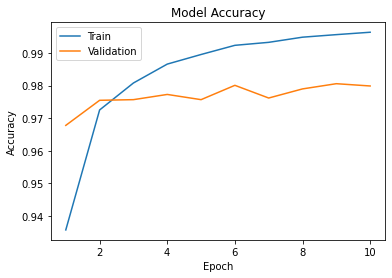

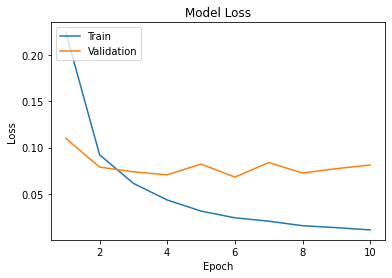

In [18]:
plotLearningCurve(history,10)

In [25]:
test_labels=model.predict(img_test)
test_labels

array([[ -8.665163  ,  -5.211869  ,  -8.111408  , ...,  13.063497  ,
         -7.3786077 ,  -0.42802238],
       [-11.7956085 ,   2.5545397 ,  24.291838  , ..., -27.804937  ,
         -6.5978584 , -22.935427  ],
       [-13.896352  ,   8.017521  ,  -3.270771  , ...,  -3.6810007 ,
         -3.707912  , -12.519205  ],
       ...,
       [-25.966867  , -15.8514595 , -24.743807  , ...,   0.76080924,
         -5.9394913 ,   0.74876934],
       [-14.242384  , -23.20417   , -16.02569   , ...,  -7.993256  ,
          0.32314363, -18.457308  ],
       [ -2.82004   , -18.201586  ,  -8.8160715 , ..., -15.477691  ,
        -14.173366  , -14.427341  ]], dtype=float32)

In [26]:
print(test_labels.shape)

(10000, 10)


In [28]:
results = np.argmax(test_labels,axis=-1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,10001),name = "ImageId"),results],axis = 1)

print(submission)

submission.to_csv("submission.csv",index=False)

      ImageId  Label
0           1      7
1           2      2
2           3      1
3           4      0
4           5      4
...       ...    ...
9995     9996      2
9996     9997      3
9997     9998      4
9998     9999      5
9999    10000      6

[10000 rows x 2 columns]
